**SUBTEMA 3.1 - GRÁFICAS ESTÁTICAS DE DATOS EN PYTHON**

---

**SESIÓN: 1**

In [ ]:
import pandas as pd

# **TEMA 1. Exploración y validación de datos**

## 1.1 Rangos típicos, categorías y valores faltantes

Sube a tu drive los dos archivos csv que el instructor te proporcionará y crea una nueva libreta en Colab para:

*   Leer dichos archivos en dos dataframes: `countries` y `cities`


In [19]:
citys = pd.read_csv('/content/world_table_city.csv')
citys

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200
...,...,...,...,...,...
4074,4075,Khan Yunis,PSE,Khan Yunis,123175
4075,4076,Hebron,PSE,Hebron,119401
4076,4077,Jabaliya,PSE,North Gaza,113901
4077,4078,Nablus,PSE,Nablus,100231


In [20]:
countries = pd.read_csv('/content/world_table_country.csv')
countries

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,129.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,56.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,62.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,YEM,Yemen,Asia,Middle East,527968.0,1918.0,18112000,59.8,6041.0,5729.0,Al-Yaman,Republic,1780.0
235,YUG,Yugoslavia,Europe,Southern Europe,102173.0,1918.0,10640000,72.4,17000.0,NaN,Jugoslavija,Federal Republic,1792.0
236,ZAF,South Africa,Africa,Southern Africa,1221037.0,1910.0,40377000,51.1,116729.0,129092.0,South Africa,Republic,716.0
237,ZMB,Zambia,Africa,Eastern Africa,752618.0,1964.0,9169000,37.2,3377.0,3922.0,Zambia,Republic,3162.0


*   Realizar un análisis de la estructura de `countries`


In [21]:
countries.head()

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,129.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,56.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,62.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,34.0



*   Explorar el contenido de `countries`



In [22]:
countries.nunique()

,0
Code,239
Name,239
Continent,7
Region,25
SurfaceArea,238
IndepYear,88
Population,226
LifeExpectancy,160
GNP,214
GNPOld,178


*   Borrar los registros que tengan `NaN` en la columna `Capital`


In [26]:
countries.dropna(axis=0, subset=['Capital'], inplace=True)

*   Ejecutar el mismo análisis con `cities`


In [24]:
cities.head()
cities.nunique()
cities.isna().sum()


,0
Code,0
Name,0
Continent,0
Region,0
SurfaceArea,0
IndepYear,47
Population,0
LifeExpectancy,17
GNP,0
GNPOld,61




*   Combinar ambos dataframes




In [30]:
countries_cities = countries.merge(cities, left_on='Capital', right_on='ID', suffixes=('Country','City'))
countries_cities
countries_cities

KeyError: 'ID'

## 1.2 Distribuciones y estadísticas

*   ¿Cuál es el promedio de población para el conjunto de países analizados?

In [31]:
countries['Population'].mean()

np.float64(26201506.25)

*   ¿Qué superficie territorial tiene el país más pequeño? ¿Y el más grande?

In [32]:
countries['SurfaceArea'].min()

0.4

*   ¿Cuál es la desviación estándar de la expectativa de vida?

In [33]:
countries['LifeExpectancy'].std()

11.519267100498716

*   ¿Qué significa que para el año de independencia está 1974 en el 3er cuartil (75%)?

In [34]:
countries['IndepYear'].describe()

,IndepYear
count,192.000000
mean,1847.260417
std,420.831370
min,-1523.000000
25%,1906.750000
50%,1960.000000
75%,1974.000000
max,1994.000000


# **TEMA 2. Plataformas de visualización en Python**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 Trazado básico y personalización de la estética

*   Generar un nuevo dataframe (`sample`) con los 6 primeros registros de `countries` y dejando únicamente las columnas `Name` y `Population`

In [36]:
sample = countries.loc[0:5, ['Name', 'Population']]
sample

,Name,Population
0,Aruba,103000
1,Afghanistan,22720000
2,Angola,12878000
3,Anguilla,8000
4,Albania,3401200
5,Andorra,78000


*   Hacer que `Name` sea el índice

In [37]:
sample.set_index('Name', inplace=True)
sample

,Population
Name,
Aruba,103000
Afghanistan,22720000
Angola,12878000
Anguilla,8000
Albania,3401200
Andorra,78000


*   Visualizar `sample` usando las tres plataformas de trazado

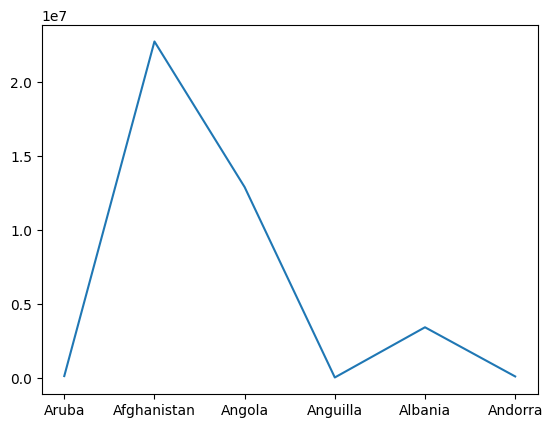

In [39]:
# Matplotlib
plt.plot(sample.index, sample['Population'])
plt.show()

<Axes: xlabel='Name'>

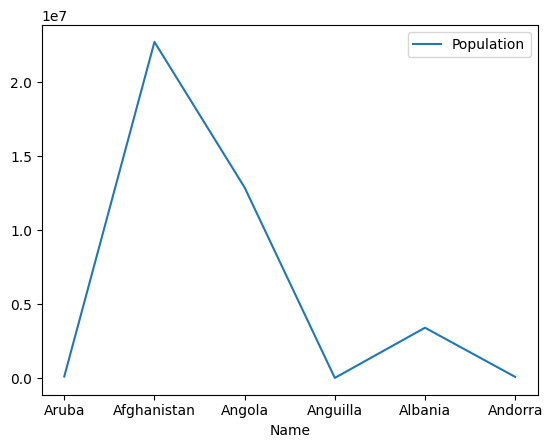

In [41]:
#PANDAS
sample.plot()

<Axes: xlabel='Name', ylabel='Population'>

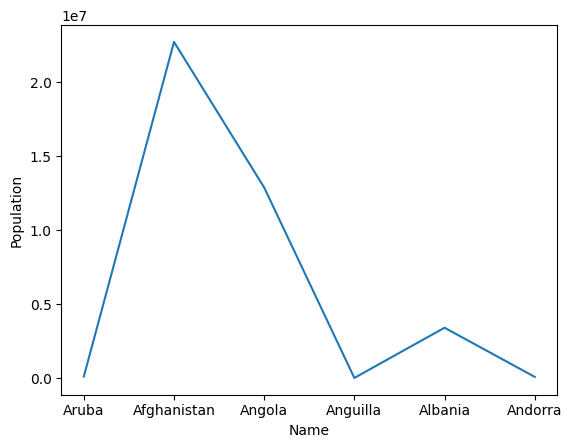

In [42]:
# Seaborn
sns.lineplot(x=sample.index, y=sample['Population'])

*   Cambiar las propiedades: `title`, `grid`, `legend`, `xlabel`, `ylabel`, `rot`, `fontsize`, `color`, `marker` y `linestyle` de la gráfica generada con Pandas

<Axes: title={'center': 'Population by country'}, xlabel='Countries', ylabel='Population'>

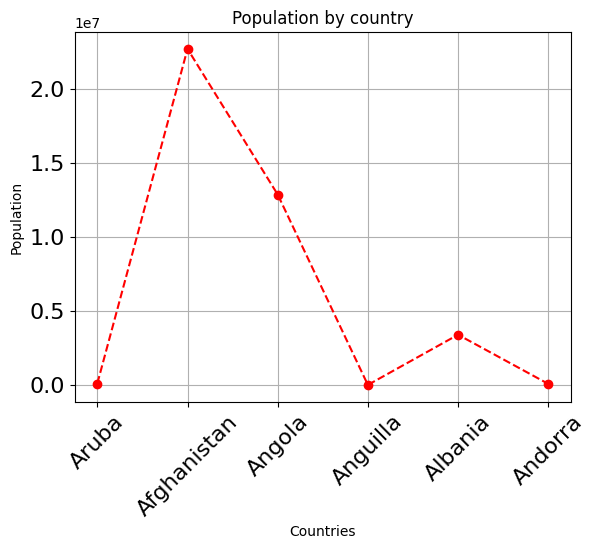

In [43]:
sample.plot(title='Population by country', grid=True, legend=False, xlabel='Countries', ylabel='Population', rot=45, fontsize=16, color='red', marker='o', linestyle='--')

*   Probar con otro dataframe (`sample2`) que almacene los 6 primeros registros de `countries`, pero con todas sus columnas

In [44]:
sample2 = countries.loc[0:5]
sample2

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,129.0
1,AFG,Afghanistan,Asia,Southern and Central Asia,652090.0,1919.0,22720000,45.9,5976.0,NaN,Afganistan/Afqanestan,Islamic Emirate,1.0
2,AGO,Angola,Africa,Central Africa,1246700.0,1975.0,12878000,38.3,6648.0,7984.0,Angola,Republic,56.0
3,AIA,Anguilla,North America,Caribbean,96.0,NaN,8000,76.1,63.2,NaN,Anguilla,Dependent Territory of the UK,62.0
4,ALB,Albania,Europe,Southern Europe,28748.0,1912.0,3401200,71.6,3205.0,2500.0,Shqipëria,Republic,34.0
5,AND,Andorra,Europe,Southern Europe,468.0,1278.0,78000,83.5,1630.0,NaN,Andorra,Parliamentary Coprincipality,55.0


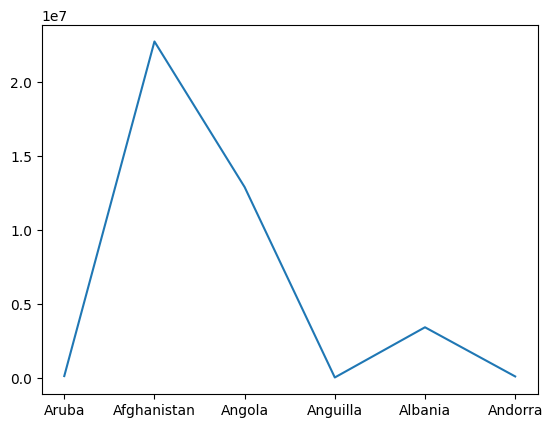

In [45]:
plt.plot(sample2['Name'], sample2['Population'])
plt.show()

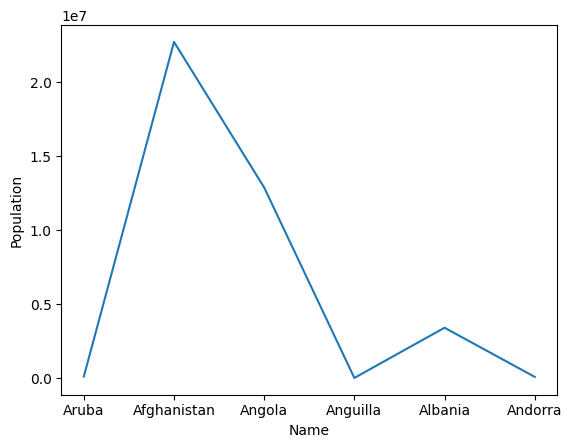

In [47]:
# Seaborn
sns.lineplot(x=sample2['Name'], y=sample2['Population'])
plt.show()

*   Cambiar el tipo de gráfico a barras usando el argumento `kind`

<Axes: xlabel='Name'>

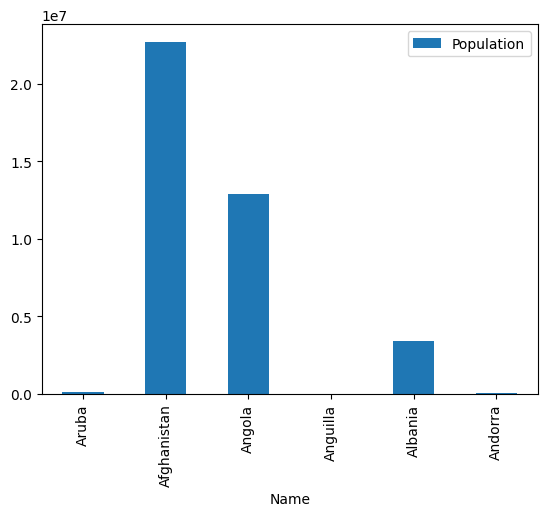

In [49]:
sample2.plot(kind='bar', x='Name', y='Population')

<Axes: xlabel='Name', ylabel='Population'>

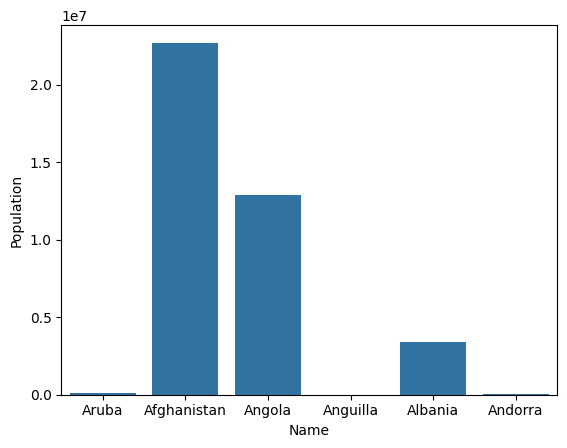

In [50]:
sns.barplot(x=sample2['Name'], y=sample2['Population'])

## 2.2 Agrupamiento y filtrado

*   Generar un nuevo dataframe (`population_by_continent`) con el resultado de agrupar la columna `Population` con el total por continente

In [51]:
population_by_continent = countries.groupby('Continent')['Population'].sum()
population_by_continent

,Population
Continent,
Africa,784475000
Asia,3705025700
Europe,730074600
North America,482993000
Oceania,30401150
South America,345780000


*   Graficar los resultados usando un gráfico pie de Pandas

<Axes: ylabel='Population'>

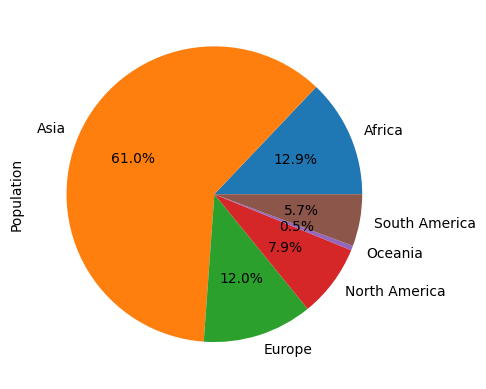

In [52]:
# Pandas
population_by_continent.plot(kind='pie', autopct='%1.1f%%')

*   Graficar el número de países por continente usando la función `countplot() `de Seaborn

<Axes: xlabel='Continent', ylabel='count'>

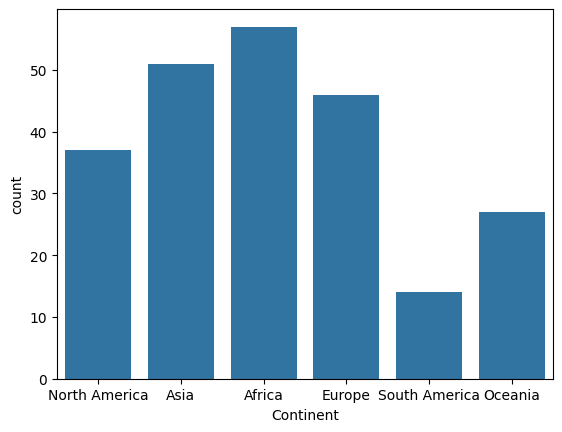

In [53]:
# Seaborn
sns.countplot(x='Continent', data=countries)

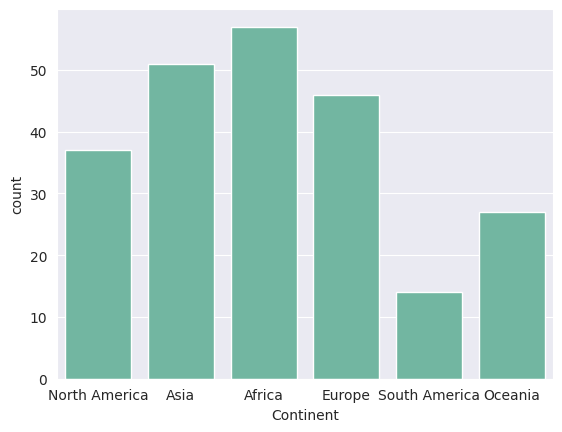

In [56]:
sns.countplot(x=countries['Continent'])
plt.show()

*   Cambiar la paleta de colores y el tema con Seaborn

In [57]:
sns.set_palette('Set2')
sns.set_style('darkgrid')

# **TEMA 3. Gráficas superpuestas**

##3.1 Compartiendo ambos ejes

*   Generar un nuevo dataframe (`gnp_by_continent`) con el resultado de agrupar las columnas `GNP` y `GNPOld` con el promedio por continente

In [60]:
gnp_by_continent = countries[['Continent','GNP', 'GNPOld']].groupby('Continent').mean()
gnp_by_continent

,GNP,GNPOld
Continent,,
Africa,10182.017544,11065.280000
Asia,150105.725490,183377.088889
Europe,206497.065217,260611.138889
North America,261854.789189,371527.000000
Oceania,15547.211111,46905.800000
South America,107991.000000,126720.083333


*   Graficar los resultados usando las tres plataformas de trazado

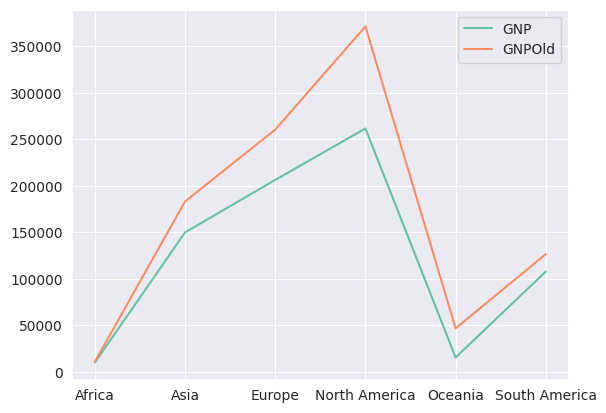

In [61]:
# Matplotlib
plt.plot(gnp_by_continent)
plt.legend(gnp_by_continent.columns)
plt.show()

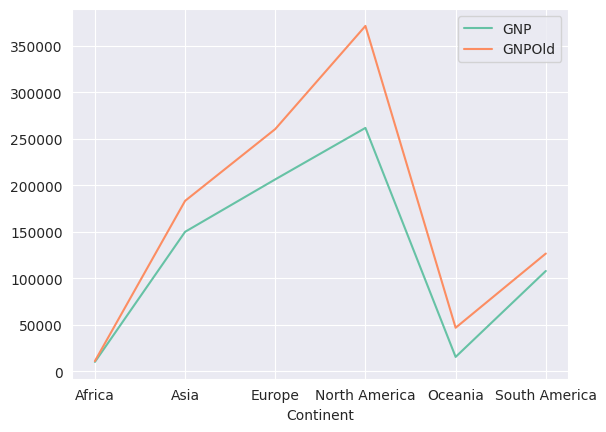

In [62]:
gnp_by_continent.plot()
plt.show()

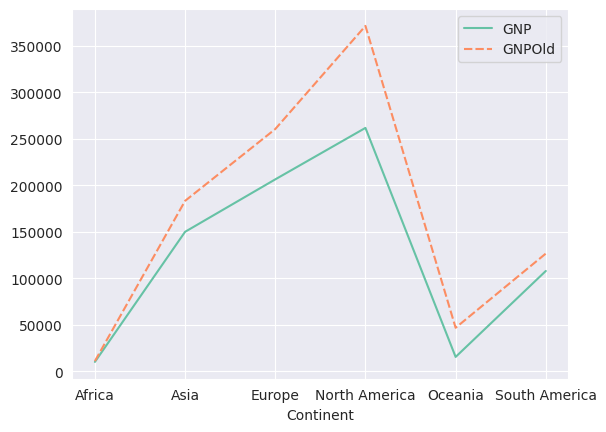

In [63]:
sns.lineplot(data=gnp_by_continent)
plt.show()

## 3.2 Compartiendo el eje horizontal con ejes verticales independientes

*   Generar un nuevo dataframe (`summary_by_continent`) con el resultado de agrupar las columnas `LifeExpectancy` y `GNP` con el promedio por continente

In [70]:
summary_by_continent = countries[['Continent','LifeExpectancy', 'GNP']].groupby('Continent').mean()
summary_by_continent

,LifeExpectancy,GNP
Continent,,
Africa,52.571930,10182.017544
Asia,67.441176,150105.725490
Europe,75.147727,206497.065217
North America,72.991892,261854.789189
Oceania,69.715000,15547.211111
South America,70.946154,107991.000000


*   Graficar `LifeExpectancy` en el eje vertical izquierdo con color azul
*   Crear un eje vertical dual o secundario
*   Graficar GNP en el eje vertical derecho con color verde

Text(0, 0.5, 'GNP')

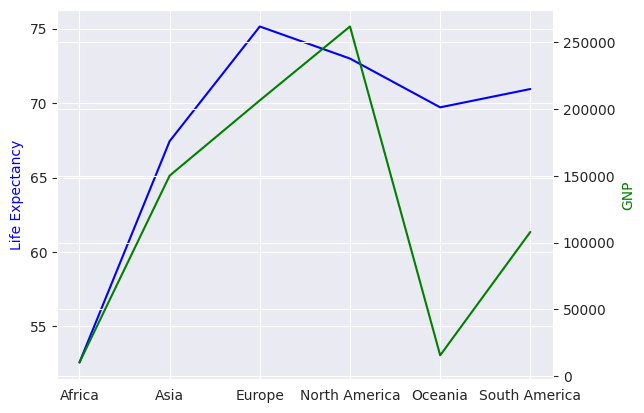

In [71]:
fig, ax1 = plt.subplots()

ax1.plot(summary_by_continent.index, summary_by_continent['LifeExpectancy'], color='blue')
ax1.set_ylabel('Life Expectancy', color='blue')

ax2 = ax1.twinx()

ax2.plot(summary_by_continent.index, summary_by_continent['GNP'], color='green')
ax2.set_ylabel('GNP', color='green')